# Introduction to Machine Learning

# Unsupervised methods

# Basic supervised machine learning methods

## Regression Methods

## Classification Methods

Classification methods are used when the target (dependent) variable is categorical, and the goal is to assign each data point to a specific category. Here the explanatory variables (independent) can be either categorical or continous. Hence, the amount of classification algorithms is very long.

Classification algorithms, unlike regressions, use evaluation metrics that are based on the amount of correct predictions of the model based on the known labels (true values). This is usually expressed as a **confusion matrix**, a table with four entries for a binary classification model: the **True Positives (TP)** and **True Negatives (TN)**, where the model correctly predicts one class or the other, and the **False Positives (FP)** and **False Negatives (FN)**, where the model incorrectly predicts the positive and negative class, respectively.

From these four elements of the table, several metrics could be extracted:

- **Precision** is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of the accuracy of positive predictions.

- **Specificity** is the ratio of correctly predicted negative observations to the total actual negatives. It is a measure of the accuracy of negative predictions.

- **Sensitivity**, also known as **recall** or **true positive rate**, is the ratio of correctly predicted positive observations to the total actual positives. It measures the model's ability to correctly identify positive instances.

- **Accuracy** is the ratio of correctly predicted observations to the total observations. It provides an overall measure of the model's correctness.

- The **F1 score** is the harmonic mean of precision and sensitivity. It provides a balance between precision and sensitivity.

<!-- Add an empty line here -->

[![Classification metrics](https://miro.medium.com/v2/resize:fit:640/format:webp/1*NhPwqJdAyHWllpeHAqrL_g.png)](https://medium.com/all-about-ml/evaluation-metrics-in-classification-algorithms-79c036a131cb)

<!-- Add an empty line here -->

### Perceptron

The perceptron is one of the most basic binary classifiers, and the fundamental building block of artificial neural networks. The idea behind the perceptron is the biological neuron, where based on the different inputs collected from the dendrites it triggers/not triggers a signal on the axon to the next neuron:

<!-- Add an empty line here -->

![Neuron](images/Neurons.png)

<!-- Add an empty line here -->

Analogously, the perceptron takes as input one or a vector of continous independent variables and their weights, which is summed up and passes the result through an **activation function** to produce a binary output $\hat{y}$. There are multiple types of activation functions:

<!-- Add an empty line here -->

[![Activation functions](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/627d12431fbd5e61913b7423_60be4975a399c635d06ea853_hero_image_activation_func_dark.png)](https://www.v7labs.com/blog/neural-networks-activation-functions)

<!-- Add an empty line here -->

For example, for a **binary step or unit step function**:

$$\hat{y} = \begin{cases} 1 & \text{if } w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n > 0 \\ 0 & \text{otherwise}
\end{cases}$$

where:
- $\hat{y}$ is the predicted output.
- $w_0, w_1, w_2, ..., w_n$ are the weights associated with the inputs.
- $x_1, x_2, ..., x_n$ are the input features.

Perceptrons are trained, learn from the data, by adjusting its weights based on the error in its predictions: 

<!-- Add an empty line here -->

![Perceptron scheme](images/Perceptron.png)

<!-- Add an empty line here -->

To understand the perceptron, we need to understand a concept that is key also for training neural networks: the **learning rule**. The learning rule is how the weights are updated based on the error in its predictions. For the perceptron, the updated weight $w^\prime_i$ is computed iteratively during the training process until convergence is achieved as follows:

$$w^\prime_i \leftarrow w_i + \alpha \cdot (y - \hat{y}) \cdot x_i$$

where:
- $w_i$ is the weight associated with the $i$-th input feature.
- $\alpha$ is the learning rate, a small positive constant of range [0, 1] that determines the step size in weight updates.
- $y$ is the true label (the actual class of the instance).
- $\hat{y}$ is the predicted output of the perceptron.
- $x_i$ is the $i$-th input feature.

Hence, the **learning rule** of the perceptron essentially adjusts the weights to reduce the difference between the predicted output ($\hat{y}$) and the true label ($y$), where the term $(y - \hat{y})$ represents the error of prediction at iteration $i$-th. With this, the weights are updated in the direction that minimizes this error at a **learning rate** $\alpha$. This constant is defined as an hyperparameter in order to maximize the search for the optimal solution: with a too small value, the alrgorithm will take too much time and computational resources to find the optimal solution (and also it might get stucked in local optimums) whereas a too large learning rate the algorithm might not use properly the gradient to find the optimas.

<!-- Add an empty line here -->

![Different learning rates](images/Learning_rate.png)

<!-- Add an empty line here -->

**Advantages:**
- Perceptrons are conceptually **simple** and computationally **efficient**.
- Perceptrons will **converge** to a solution if the data is linearly separable.

**Disadvantages:**
- Perceptrons are **limited to linear separability** (can only learn linear decision boundaries).
- Sensitivity to Outliers: Outliers can significantly impact perceptron performance.
- Perceptrons only produce binary outputs **without associated probabilisties**. 

As a practical example, we will use the output of PCA applied to the transcriptomic profile across blood tumors. We will try to train models that are able to differentiate different histological subtypes of primary blood cancers based on the two first principal components (linear combinations of genes expression that explain most of the variability in expression).

In order to define histological subtypes, we will have to download that information from ICGC, contained in the **pcawg_specimen_histology_August2016_v9.xlsx** excel file.

In [26]:
import pandas as pd
import numpy as np
from os import path

# To ignore some plot warnings
import warnings
warnings.filterwarnings('ignore')

# We load the expression data
expression_df = pd.read_csv(path.join('data', 'gene_expression.tsv.gz'),
                                                        sep="\t", header='infer', index_col=0, compression='gzip')

# Get sample dataframe with the information
sample_df = pd.read_csv(path.join('data', 'sample_df.tsv'), sep="\t", header='infer')

# Finally we load directly from the ICGC database the histology excel file
histology_df = pd.read_excel('https://dcc.icgc.org/api/v1/download?fn=/PCAWG/clinical_and_histology/pcawg_specimen_histology_August2016_v9.xlsx')
histology_df.columns = ['icgc_specimen_id'] + list(histology_df.columns[1:])
histology_df

,icgc_specimen_id,project_code,submitted_specimen_id,submitted_sample_id,tcga_specimen_uuid,icgc_sample_id,tcga_sample_uuid,donor_unique_id,icgc_donor_id,submitted_donor_id,...,tumour_histological_type,tumour_stage,tumour_grade,percentage_cellularity,level_of_cellularity,tcga_expert_re-review,tumour_histological_comment,specimen_donor_treatment_type,donor_wgs_included_excluded,specimen_library_strategy
0,SP2143,BRCA-UK,CGP_specimen_1142534,PD3851a,NaN,SA6125,NaN,BRCA-UK::CGP_donor_1114930,DO1000,CGP_donor_1114930,...,Duct micropapillary carcinoma,NaN,G2,NaN,NaN,NaN,NaN,no treatment,Included,WGS
1,SP2144,BRCA-UK,CGP_specimen_1096043,PD3890a,NaN,SA6128,NaN,BRCA-UK::CGP_donor_1069291,DO1001,CGP_donor_1069291,...,"Infiltrating duct carcinoma, NOS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Included,WGS
2,SP2145,BRCA-UK,CGP_specimen_1142475,PD3904a,NaN,SA6131,NaN,BRCA-UK::CGP_donor_1114881,DO1002,CGP_donor_1114881,...,"Infiltrating duct carcinoma, NOS",NaN,G2,NaN,NaN,NaN,NaN,NaN,Included,WGS
3,SP2146,BRCA-UK,CGP_specimen_1142532,PD3905a,NaN,SA6134,NaN,BRCA-UK::CGP_donor_1114929,DO1003,CGP_donor_1114929,...,"Infiltrating duct carcinoma, NOS",NaN,G3,NaN,1-20%,NaN,NaN,no treatment,Included,WGS
4,SP2147,BRCA-UK,CGP_specimen_1195364,PD3945a,NaN,SA6137,NaN,BRCA-UK::CGP_donor_1167078,DO1004,CGP_donor_1167078,...,"Infiltrating duct carcinoma, NOS",NaN,G3,NaN,NaN,NaN,NaN,NaN,Included,WGS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,SP21193,COAD-US,TCGA-A6-2681-01A,TCGA-A6-2681-01A-01R-1410-07,0537bad8-0e85-4b05-91b3-fd965e96d0d7,SA102595,0031d433-d703-4b2c-9fdf-2920008eb457,COAD-US::7d8eab0a-e6c8-4449-9ebf-50c41db94a06,DO9788,TCGA-A6-2681,...,"Adenocarcinoma, NOS",NaN,NaN,75.0,70-75,NaN,NaN,NaN,Included,RNA-Seq
4253,SP21400,COAD-US,TCGA-AA-A00N-01A,TCGA-AA-A00N-01A-02D-A17O-10,d52f3d05-1850-473e-8e1e-ab2b4f88af2a,SA105050,6ca5c1bb-275b-4d05-948a-3c6c7d03fab9,COAD-US::e457344d-76fb-46bf-b362-61a6e811d131,DO9876,TCGA-AA-A00N,...,Mucinous adenocarcinoma,NaN,NaN,70.0,75-70,NaN,NaN,NaN,Included,WGS
4254,SP21400,COAD-US,TCGA-AA-A00N-01A,TCGA-AA-A00N-01A-02R-A00A-07,d52f3d05-1850-473e-8e1e-ab2b4f88af2a,SA105060,c3a004b4-f231-4be4-9738-2f3b6290598f,COAD-US::e457344d-76fb-46bf-b362-61a6e811d131,DO9876,TCGA-AA-A00N,...,Mucinous adenocarcinoma,NaN,NaN,70.0,75-70,NaN,NaN,NaN,Included,RNA-Seq
4255,SP21528,COAD-US,TCGA-AA-3534-01A,TCGA-AA-3534-01A-01D-1525-10,ecade2c1-9de2-4b05-b30c-4c8b81c65ae1,SA106552,66701395-5a53-41bb-866b-3bbf08bc33ab,COAD-US::df228c56-89ac-4122-93b3-6c0740c4ec09,DO9940,TCGA-AA-3534,...,"Adenocarcinoma, NOS",NaN,NaN,70.0,80-70,NaN,NaN,NaN,Included,WGS


In [27]:
# Generate a dictionary to translate the Specimen IDs to the histological subtype
tumortype_dict = dict(zip(histology_df.icgc_specimen_id, histology_df.histology_tier3))

# Get the specimensID of blood cancers
specimens_blood = sample_df[sample_df['primary_location']=='Blood']['icgc_specimen_id']

# Intersect with the available columns to find the blood cancer specimens with available expression
subset_specimens = list(set(expression_df.columns).intersection(set(specimens_blood)))

# Filter the data to do the PCA only with blood cancer specimens
blood_expression_df = expression_df[subset_specimens].copy()

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# We preprocess the data with standarization
scaler = StandardScaler()
blood_data = scaler.fit_transform(blood_expression_df.T)

# We perform the PCA
blood_pca2D = PCA(n_components=2)
blood_proj_data = blood_pca2D.fit_transform(blood_data)

# We can check the amount of variance explained by the two Principcal components
print(blood_pca2D.explained_variance_ratio_)

[0.24972332 0.0760894 ]


In [29]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

def plot_PCA_withlabels(proj_data, labels, plotname):
    
    # Automatically create a mapping from label categories to integers
    unique_labels = np.unique(labels)
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
    # Convert labels to integers based on the automatic mapping
    label_integers = np.array([label_mapping[label] for label in labels])
    # Automatically generate a ListedColormap with unique colors based on the number of labels
    num_colors = len(unique_labels)
    color_map = plt.get_cmap('tab20', num_colors)
    # Create a ListedColormap with unique colors
    listed_color_map = ListedColormap([color_map(idx) for idx in range(num_colors)])

    # Plot with colours 
    # We plot the data (the first two components are the first two columns of proj_data)
    scatter = plt.scatter(proj_data[:,0], proj_data[:,1], s=2, c=label_integers, cmap=listed_color_map)

    # Create legend handles and labels
    legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map(idx), markersize=10, label=label)
                      for idx, label in enumerate(unique_labels)]

    # Add legend
    plt.legend(handles=legend_handles, title='Tumor Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.title('Transcriptome')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Save image
    plt.savefig(path.join('plots', plotname))
    plt.show()
    
    return(label_integers)

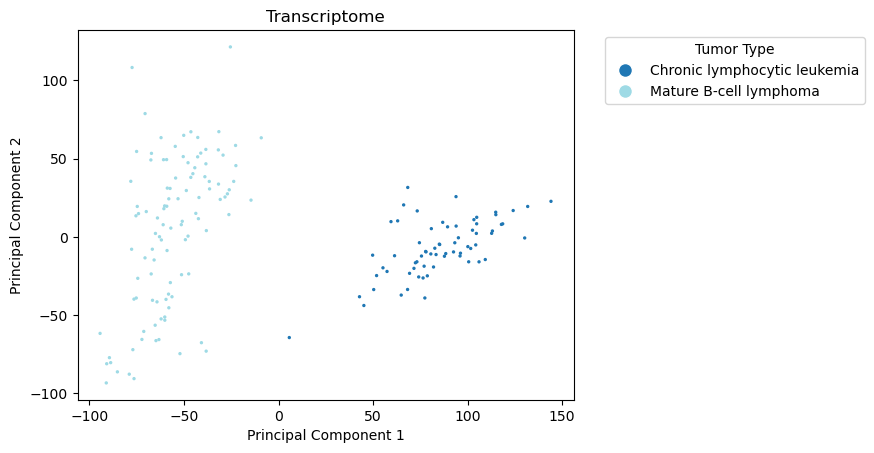

In [30]:
# Get the tumor type for each sample (each column)
labels = blood_expression_df.columns.map(tumortype_dict)
blood_label_integers = plot_PCA_withlabels(blood_proj_data, labels, 'Blood_PCA.png')

There is a clear separation between chronic lymphocitic leukemias and mature B-cell lymphomas. Now, we can train a perceptron using scikit-learn that can separate both groups. For this kind of classifier models it is useful to **standarize** the data as we saw for the dimensionality reduction algorithms, however, the output of the PCA is already standarized so both **training** and **test** dataset, which derive from the same standarize output, will have the same scale.

In [31]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Define the dependent and independent variables
## The labels are the two types of blood cancers we want to separate, encoded as 0s and 1s.
y = pd.DataFrame(blood_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(blood_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ppn = Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

The model is already trained with the training dataset, but before plotting the results on the test dataset we can define a function to conviniently visualize the decision boundary regions that arise from training the perceptron or other classifier models that we will see on this session.

In [9]:
def plot_decision_regions(X, y, classifier, resolution, test_idx=None):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    cmap = plt.get_cmap('Paired', len(markers))

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1, c=cmap(idx), 
                    marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx.any():
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='black',
        alpha=0.2, linewidth=0.1, marker='o',
        s=55, label='test set')

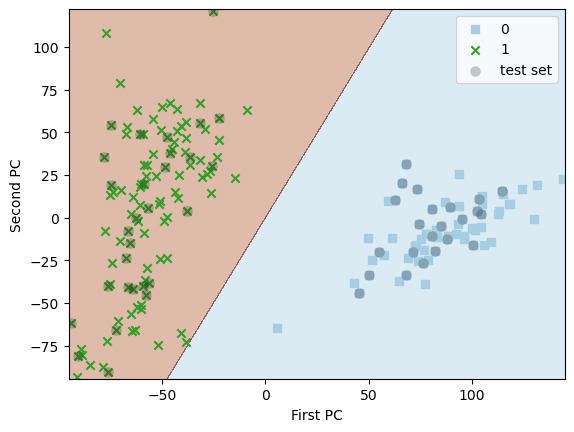

In [10]:
# Get the indexes into numpy format to mark the test dataset
test_idx = X_test.index.to_numpy()
# The function needs the independent and dependent dataframes to be passed as numpy arrays
X_numpy = X.to_numpy()
y_numpy = y[0].to_numpy()

# Call the function to generate the plot
plot_decision_regions(X_numpy, y_numpy, ppn, 0.1, test_idx)
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Perceptron_blood.png'))
plt.show()

Since the two classes can be separated linearly, the perceptron works well on the classification task. This is reflected on the performance metrics.

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def compute_evaluation_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Precision, Recall, F1 Score for binary classification
    if len(np.unique(y_test)) == 2:
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1 Score: {f1:.2f}')

    # Precision, Recall, F1 Score for multi-class classification
    else:
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {recall:.2f}')
        print(f'F1 Score: {f1:.2f}')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)
    
    
compute_evaluation_metrics(ppn, X_test, y_test)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[23  0]
 [ 0 29]]


But, it will work that well on a dataset with no clear lineal decision boundary? Let's try for instance with Kidney cancer, where there are three subtypes of adenocarcinomas depending on the affected cell.

In [12]:
# Generate a dictionary to translate the Specimen IDs to the histological subtype
subtype_tumortype_dict = dict(zip(histology_df.icgc_specimen_id, histology_df.histology_tier4))

# Get the specimensID of blood cancers
specimens_kidney = sample_df[sample_df['primary_location']=='Kidney']['icgc_specimen_id'].copy()

# Intersect with the available columns to find the blood cancer specimens with available expression
subset_specimens = list(set(expression_df.columns).intersection(set(specimens_kidney)))

# Filter the data to do the PCA only with blood cancer specimens
kidney_expression_df = expression_df[subset_specimens].copy()

In [13]:
# We preprocess the data with standarization
scaler2 = StandardScaler()
kidney_data = scaler2.fit_transform(kidney_expression_df.T)

# We perform the PCA
kidney_pca2D = PCA(n_components=2)
kidney_proj_data = kidney_pca2D.fit_transform(kidney_data)

# We can check the amount of variance explained by the two Principal components
print(kidney_pca2D.explained_variance_ratio_)

[0.18593706 0.09709004]


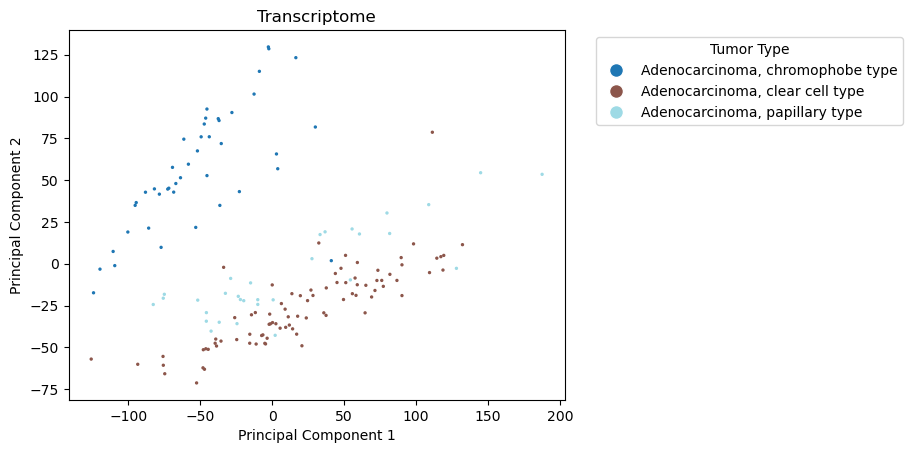

In [15]:
# Get the tumor type for each sample (each column)
labels = kidney_expression_df.columns.map(subtype_tumortype_dict)
kidney_label_integers = plot_PCA_withlabels(kidney_proj_data, labels, 'Kidney_PCA.png')

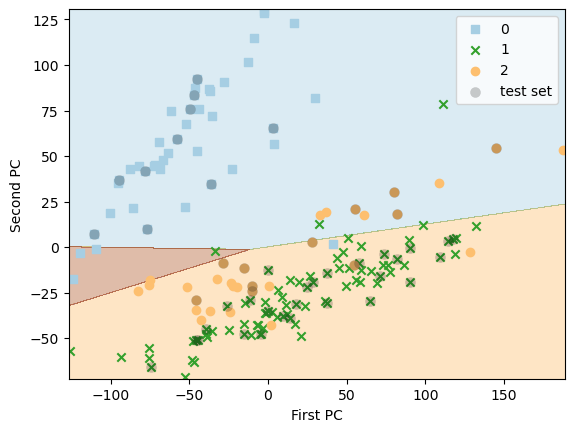

In [16]:
# Define the dependent and independent variables
## The labels are the two types of kidney cancers we want to separate, encoded as 0s, 1s and 2s.
y = pd.DataFrame(kidney_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(kidney_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ppn = Perceptron(eta0=0.1, random_state=42)
ppn.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), ppn, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Perceptron_kidney.png'))
plt.show()

In [17]:
# We check the metrics in this case
compute_evaluation_metrics(ppn, X_test, y_test)

Accuracy: 0.77
Precision: 0.60
Recall: 0.77
F1 Score: 0.67
Confusion Matrix:
[[10  0  0]
 [ 0 27  0]
 [ 4  7  0]]


Now we have a three class confusion matrix, which is interpreted as shown on the following example:

<!-- Add an empty line here -->

![3 class confusion matrix](images/3class_confmatrix.png)

<!-- Add an empty line here -->

The metrics computed from a multiclass confusion matrix, in this case, are weig


### Logistic Regression

Logistic Regression is a popular statistical method used for binary classification tasks, although, similarly to the perceptron, it is possible to implement it on multi-class taks by dividing the problem in multiple binary classifiers of one vs the rest or **OvR** (in this case we have a **multinomial logistic classification**).

The logistic regression model works by transforming a linear combination of input features using a **logit function** (do not confuse with the **logistic or sigmoid function** which is the inverse) as follows:

$$P(Y) = \frac{1}{1 + e^{-z}}$$

where:
- $P(Y)$ is the probability of the target (dependent) variable.
- $e$ is the base of the natural logarithm.
- $z$ is the linear combination of input features and their corresponding weights: $z = β₀ + β₁x₁ + β₂x₂ + ... + β_nx_n$.
  
Hence, the logit function maps any real-valued number to the range [0, 1], which is crucial for interpreting the output as a probability, and thus, assign each element to a given class based on the ratio of probabilities. Then, once the model is trained, we can use the inverse **logistic or sigmoid function** to predict the probability that a certain sample belongs to a particular class given the input features.

<!-- Add an empty line here -->

[![Logit function](https://i.stack.imgur.com/WY61Z.png)](https://en.wikipedia.org/wiki/Logit)

<!-- Add an empty line here -->

On this setting, the linear combination of input features is related with the logarithm of the odds-ratio** (also known as **log-odds**) since from the logistic regression formula we can derive that:

$$logit(P(Y)) = ln(\frac{P(Y)}{1 - P(Y)}) = β₀ + β₁x₁ + β₂x₂ + ... + β_nx_n$$

The **odds-ratio**, expressed as $\frac{P(Y)}{1 - P(Y)}$, is the relationship of the probability of one event with respect to the opposite one (on a binary situation) and can be used as the association strength between two events. From the relative probabilities of belonging to once class vs others, a **unit step function or quantizer** chooses the class with the highest probability to provide that as output.

<!-- Add an empty line here -->

![Logistic classificator scheme](images/Logistic.png)

<!-- Add an empty line here -->


The **learning rule** here is the maximization of a **likelihood function** (from a simplified perspective, the algorithm finds the proper weights by maximizing a function that provides the **probability of observing the training data given the parameters of the model**, if you need more information look at the bibliography).

**Advantages:**
- Logistic regression provides **interpretable** results since the coefficients can be directly interpreted in terms of changes in log odds: it provides with probabilities during the classification.
- Training logistic regression models is computationally **efficient** and scales well to large datasets.

**Disadvantages:**
- A critical assumption is the **absence of extreme outliers** in the dataset, which distort the training (could be verified by calculating Cook’s distance (Di) to identify influential data points that may negatively affect the regression model).
- Logistic regression **assumes a linear relationship between the log-odds and the independent variables**, which translated into a linear decision boundary. This might not be suitable for datasets with complex, non-linear relationships between features (better use support vector machines or decision tress and derivates).
- Assumes little to no multicollinearity between explanatory variables.

Let's see how it works for both blood and kidney cancer examples.

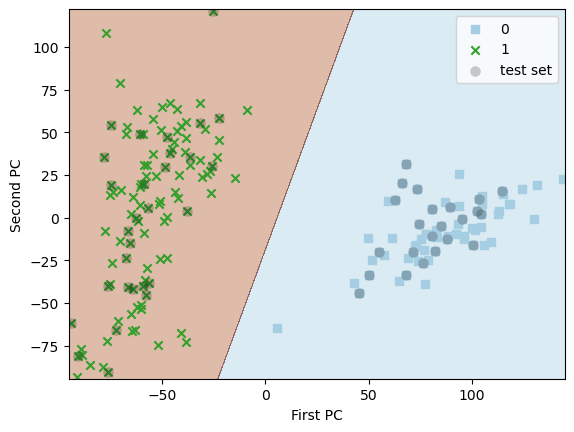

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[23  0]
 [ 0 29]]


In [18]:
from sklearn.linear_model import LogisticRegression

# Define the dependent and independent variables
## The labels are the two types of blood cancers we want to separate, encoded as 0s and 1s.
y = pd.DataFrame(blood_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(blood_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), lr, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Logistic_blood.png'))
plt.show()

# We check the metrics in this case
compute_evaluation_metrics(lr, X_test, y_test)

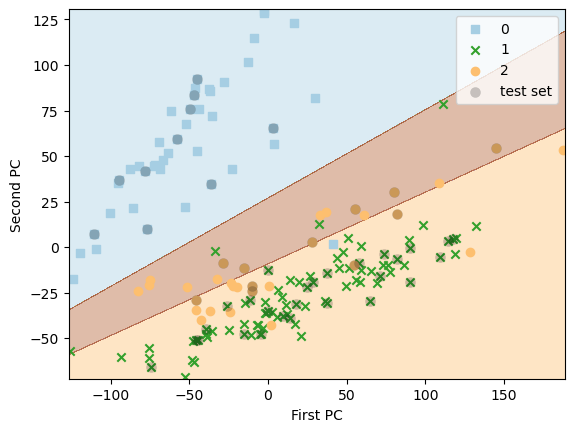

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.88
Confusion Matrix:
[[10  0  0]
 [ 0 27  0]
 [ 0  5  6]]


In [19]:
# Define the dependent and independent variables
## The labels are the two types of kidney cancers we want to separate, encoded as 0s, 1s and 2s.
y = pd.DataFrame(kidney_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(kidney_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), lr, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Logistic_blood.png'))
plt.show()

# We check the metrics in this case
compute_evaluation_metrics(lr, X_test, y_test)

### Support Vector Machines (SVM)

Support Vector Machines (SVM) are powerful supervised learning models used for classification and regression tasks. SVM aims to find the optimal hyperplane that separates data points of different classes in feature space. The hyperplane is defined by:

$$f(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

where:
- $f(x)$ is the decision function.
- $\beta_0, \beta_1, \beta_2, ..., \beta_n$ are the coefficients (weights) to be learned.
- $x_1, x_2, ..., x_n$ are the input features.

In contrast with the perceptron, where the objective was to minimized misclassification errors, in SVMs the optimization objective is to **maximize the margin** (the **learning rule** of SVM), defined as the distance between the separating hyperplane (the decision boundary) and the training samples that are closest to this hyperplane, which are the so-called **support vectors** (the data points that lie closest to the decision boundary). This is illustrated in the following figure:

<!-- Add an empty line here -->

![Margin concept](images/Margin.png)

<!-- Add an empty line here -->

The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error (the decision boundaries are less influenced by the training dataset) whereas models such as the perceptron with small margins are more prone to fall into **overitting** issues. However, as you might understand, this concept of **maximizing the margins** is therorethically suitable if there is an hyperplane that is able to separate all the training groups. But what about cases where that is impossible? How can we build a good enough model in this situation where margins are not that clear?

To assess that the algorithm takes into account a concept known as **soft-margin classification**, where an internal extra parameter called **slack variable** (see the bibliography for mathematical details) allows to relax the constrains for nonlinearly separable data to allow convergence of the optimization in the presence of misclassifications under the appropriate cost penalization. This is controlled by an **hyperparameter of the model C** where increasing values of C increases the bias and lowers the variance of the model to adjust for the **bias-variance** tradeoff:

<!-- Add an empty line here -->

![Regularization parameter C](images/ParamC.png)

<!-- Add an empty line here -->


**Advantages:**
- Effective in high-dimensional spaces.
- Can handle **linear and non-linear relationships** using different kernel functions.

<!-- Add an empty line here -->

![Non-linear relationships](images/Kernel.png)

<!-- Add an empty line here -->

- **Robust to overfitting**, especially in high-dimensional spaces. Thanks to the hyperparameter C.

**Disadvantages:**
- Training is more **computationally expensive** can be high for large datasets.
- SVMs are **sensitive to noise** present on the data. It is important to play with the hyperparameter C to adjust for that.

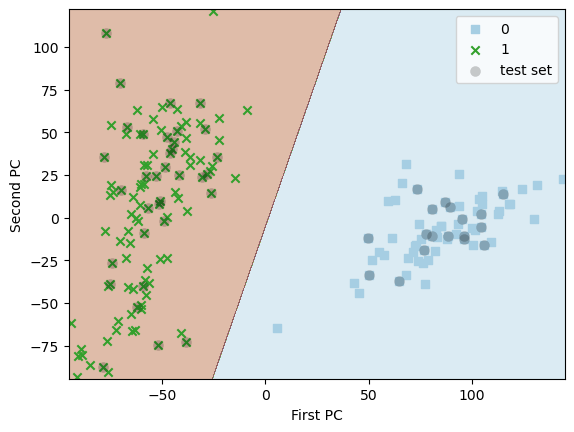

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[18  0]
 [ 0 34]]


In [259]:
from sklearn.svm import SVC

# Define the dependent and independent variables
## The labels are the two types of blood cancers we want to separate, encoded as 0s and 1s.
y = pd.DataFrame(blood_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(blood_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), svm, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'SVM_c1_blood.png'))
plt.show()

# We check the metrics in this case
compute_evaluation_metrics(svm, X_test, y_test)

Here the classifier works in a similar way to the simple perceptron that we trained at the start of this session. However, notice that the **decision boundary** now is optimized to maximize the margin between the two training sets and avoid overfitting. If we apply the same settings to train a model for the kidney cancer, where there is no clear linear separation, the performance is less optimal and more similar to the one obtained with the **logistic model**.

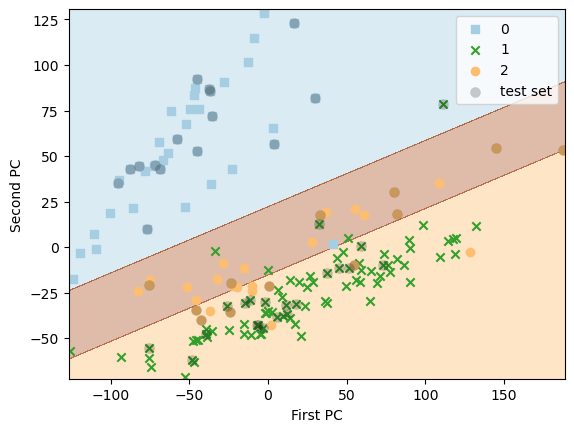

Accuracy: 0.85
Precision: 0.86
Recall: 0.85
F1 Score: 0.85
Confusion Matrix:
[[15  0  0]
 [ 1 19  1]
 [ 0  5  7]]


In [260]:
# Define the dependent and independent variables
## The labels are the two types of kidney cancers we want to separate, encoded as 0s, 1s and 2s.
y = pd.DataFrame(kidney_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(kidney_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), svm, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Logistic_blood.png'))
plt.show()

# We check the metrics in this case
compute_evaluation_metrics(svm, X_test, y_test)

However, unlike the **logistic model** which cannot work with non-linear decision boundaries, on **SVM** we can use the kernel trick to solve non-linear classifications. This is the key aspect why SVM enjoy high popularity among machine learning practitioners.

To simplify, kernels can be interpreted as a similarity function between pairs of samples so we can model an "extra non-existent dimension" to allow for non-linear boundaries. One of the most popular **kernel functions** is the **Radial Basis Function (RBF) or Gaussian kernel**, which is the one we are going to implement in our example.

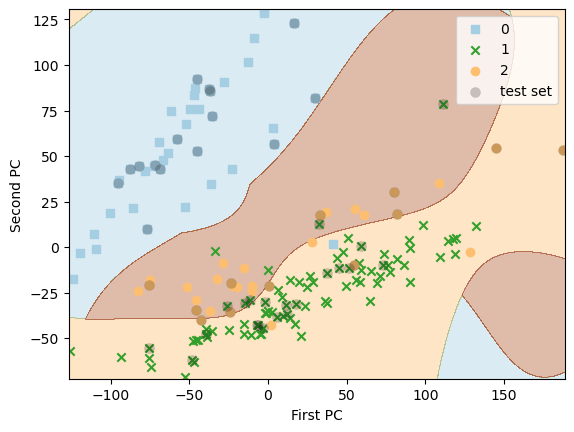

Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
Confusion Matrix:
[[15  0  0]
 [ 0 16  5]
 [ 0  5  7]]


In [269]:
# Define the dependent and independent variables
## The labels are the two types of kidney cancers we want to separate, encoded as 0s, 1s and 2s.
y = pd.DataFrame(kidney_label_integers)
## The two features are the two first PC, already on the 2D numpy array format (columns are the PC)
X = pd.DataFrame(kidney_proj_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now let's simply change the kernel from linear to rbf
# We will also play with the C parameter to try to fit the data
svm = SVC(kernel='rbf', C=50, random_state=42)
svm.fit(X_train, y_train)

plot_decision_regions(X.to_numpy(), y[0].to_numpy(), svm, 0.1, X_test.index.to_numpy())
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.legend(loc='upper right')

# Save image
plt.savefig(path.join('plots', 'Logistic_blood.png'))
plt.show()

# We check the metrics in this case
compute_evaluation_metrics(svm, X_test, y_test)

For instance with a C hyperparameter of 50 we are forcing the **SVM** to try to fit better the model that tries to classify class 2 (the most difficult one to separate) even if we are incurring into some level of overfitting.

### Random Forest

To understand the Random Forest, first we need to understand the **Decision Trees**: a classic tree-like model used for classification based on multiple "decisions" based on several independent variables.

<!-- Add an empty line here -->

[![Decision trees](https://miro.medium.com/v2/resize:fit:1280/0*4QE-0kavxXfzF_bR.png)](https://en.wikipedia.org/wiki/Decision_tree)

<!-- Add an empty line here -->

Since each of these decision trees is considered a model per se, a **Random forest** which is a model arising from the combination of multiple decision trees, it is an **ensemble method**, that is, a machine learning model composed of multiple small models with the idea of outperforming the accuracy obtained from individual models alone.

Therefore, the algorithm behind **Random forest** models involves the recursive splitting of the dataset based on the features that best separate the data into distinct classes or groups. The goal is to create decision rules that efficiently partition the data by randomly sampling of the features that best separate the data into distinct classes or groups. Therefore, the steps for a random forest classifier are:

1. **Build Decision Trees:** Create multiple decision trees using bootstrapped samples and random subsets of features. Hence, each building block of the random forest is trained on a random subset of the training data and features, allowing for diversity.

2. **Aggregate Predictions:** Combine the predictions of individual trees through voting or averaging.

3. **Model Evaluation:** Assess the model's performance using metrics like accuracy or F1 score.


<!-- Add an empty line here -->

[![Random forest classifier](https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG)](https://en.wikipedia.org/wiki/Random_forest)

<!-- Add an empty line here -->

Random forest **can handle both classification and regression taks**. The **learning rule** of this classifier is to maximize the "discriminative power" for classification taks and the error distance for regression tasks. This is commonly evaluated with the **Gini impurity** metric for classification tasks or the **mean squared error** for regression tasks.

**Advantages:**
- Random Forests reduce are **robust to overfitting** by averaging the predictions of multiple trees.
- Capable of **capturing complex, non-linear relationships** in the data.
- Provides a measure of feature importance such as the **Gini impurity**.

**Disadvantages:**
- Random Forests **cannot be easily interpreted**, often considered as "black-box" models
- Can be **computationally expensive** for large datasets and many trees.

For the following examples instead of the our multiomics dataset, we will work with a mock dataset that is already present on the scikit-learn package, which will be better to exemplify the largest power of decision trees: working with high number of features and evaluate the importance of each of them in the classification power. This is the dataset that will be used for the first deadline of delivery exercises. First we will build a simple decision tree classifier.

In [24]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
from sklearn import datasets

iris = datasets.load_iris()
# Continous independent variables
X = iris['data']
# Labels or dependent variable (discrete classes)
y = iris['target']

print(iris.keys())
print('')
print('feature names:', iris['feature_names'])
print('target names:', iris['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


[Text(0.4444444444444444, 0.9166666666666666, 'x[3] <= -0.519\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'x[3] <= 0.742\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.4444444444444444, 0.5833333333333334, 'x[2] <= 0.704\ngini = 0.198\nsamples = 45\nvalue = [0, 40, 5]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[3] <= 0.609\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.4166666666666667, 'x[3] <= 0.477\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.7777777777777778, 0.25, 'x[0] <= 1.36\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.6666666666666666, 0.08333333333

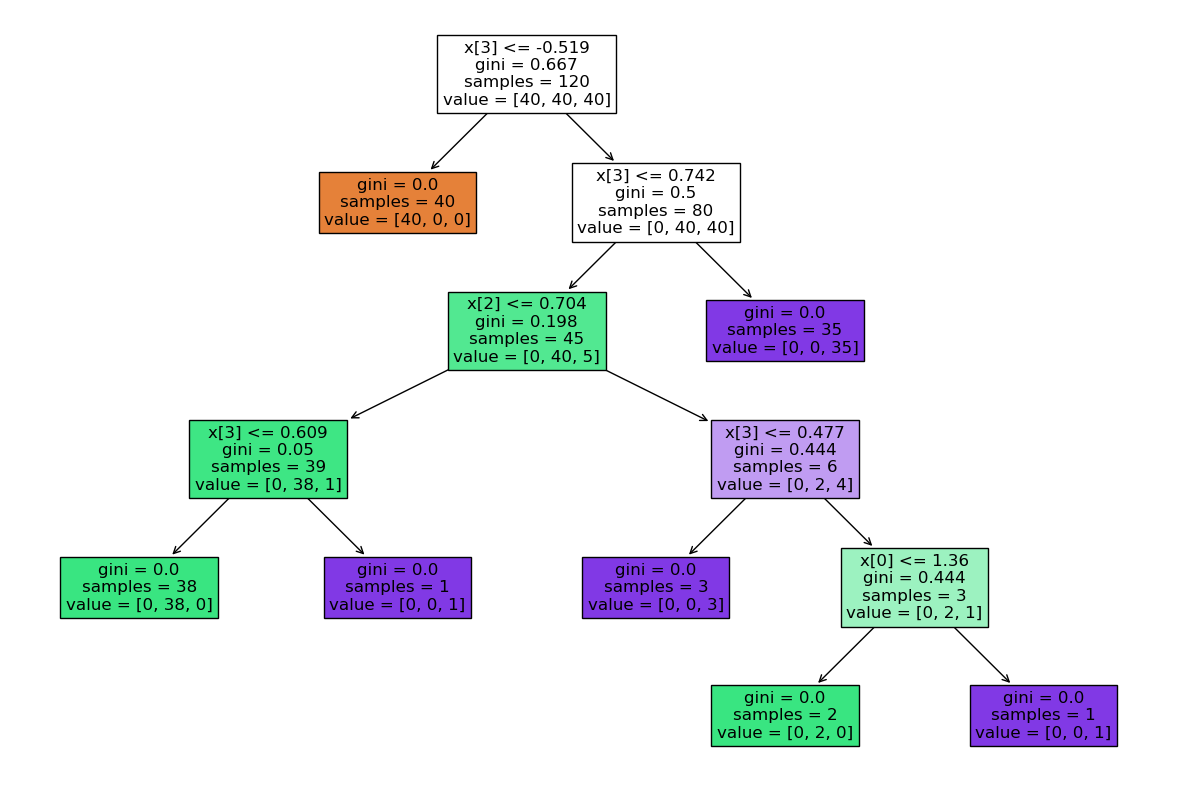

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

plt.figure(figsize=(15,10))
plot_tree(decision_tree, fontsize=12, filled=True)

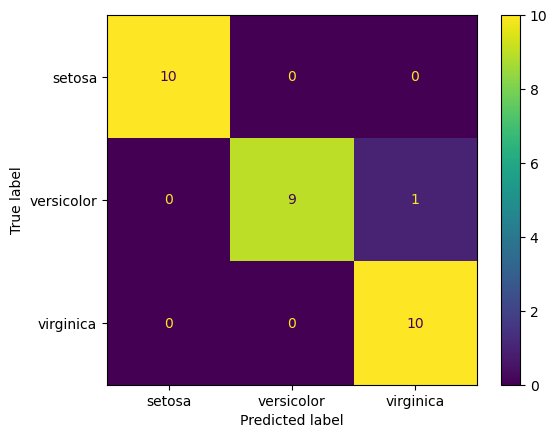

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris['target_names'])
disp.plot()

Okay, now instead of an individual decision tree we will train a random forest classifier with the same dataset.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

0.9666666666666667
0.9665831244778613


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature importances: [0.09216666 0.02975732 0.46328393 0.41479208]


Text(0, 0.5, 'Relative feature importance')

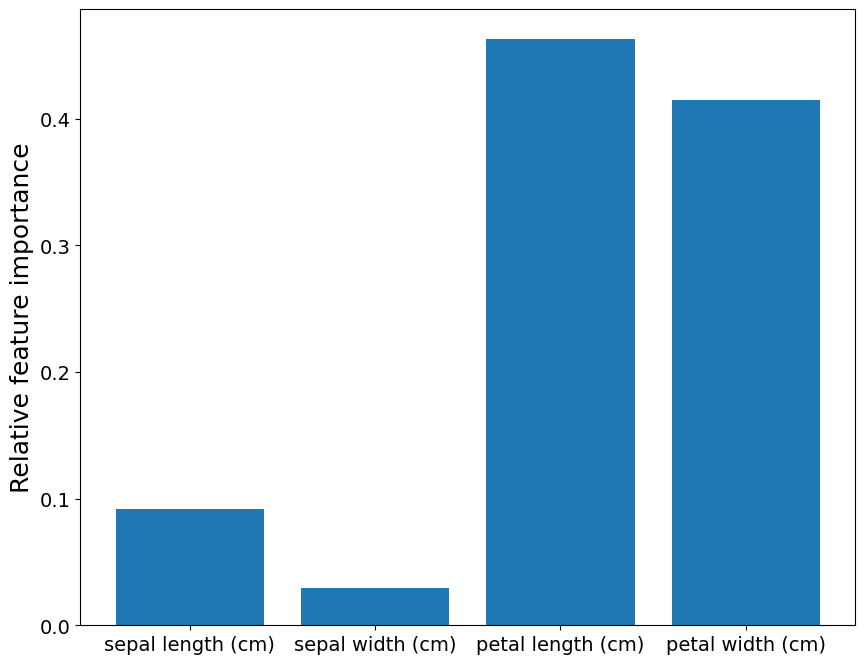

In [12]:
print(iris['feature_names'])
print('feature importances:', random_forest.feature_importances_)
plt.figure(figsize=(10,8))
plt.bar(iris['feature_names'], random_forest.feature_importances_)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Relative feature importance', fontsize=18)

The random forest classifier, by building random decision trees from the data is able to better grasp the relative importance of each of the features in the classification of the different classes.